
1. PyTorch supports map- and iterable-style dataset classes. A map-style dataset is derived from the abstract class torch.utils.data.Dataset
2.  iterable-style dataset, on the other hand, is derived from the torch.utils.data.IterableDataset abstract class. It implements the iter() 
3. 
    TensorDataset(tensors)
    Creates a dataset object from a tensor
    
    ConcatDataset(datasets)
    Creates a dataset from multiple datasets
    
    ChainDataset(datasets)
    Chains multiple IterableDatasets
    
    Subset(dataset, indices)
    Creates a subset of a dataset from specified indices

4. The Dataset class returns a dataset object that includes data and information about the data. The Sampler class returns the actual data itself in a specified or random fashion. The DataLoader class combines a dataset with a sampler and returns an iterable

5. 

Writing a net 

In [13]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1024,512)
        self.fc2 = nn.Linear(512,128)
    def forward(self,inp):
        out = inp.view(-1,1024)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.softmax(out)
        return out
        

In [19]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
)


In [22]:
import torch
y = net(torch.rand(10,1024))
print(y.shape,y)

torch.Size([10, 128]) tensor([[0.0088, 0.0073, 0.0073,  ..., 0.0078, 0.0085, 0.0073],
        [0.0095, 0.0073, 0.0073,  ..., 0.0078, 0.0080, 0.0073],
        [0.0084, 0.0073, 0.0073,  ..., 0.0073, 0.0073, 0.0073],
        ...,
        [0.0093, 0.0073, 0.0073,  ..., 0.0074, 0.0081, 0.0073],
        [0.0076, 0.0072, 0.0072,  ..., 0.0082, 0.0084, 0.0072],
        [0.0076, 0.0073, 0.0073,  ..., 0.0075, 0.0089, 0.0073]],
       grad_fn=<SoftmaxBackward0>)


C:\Users\Suraj\AppData\Local\Temp\ipykernel_6248\1918761778.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(out)


In [35]:
from torch import optim
from torch.nn import CrossEntropyLoss
class LeNet5(nn.Module): 
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),
                        (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1,
                   int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = LeNet5().to(device=device) 
lossfn = CrossEntropyLoss()
opt = optim.SGD(model.parameters(),lr = 0.001,momentum=0.9)

In [33]:
from torchvision.datasets import CIFAR10
from torchvision import transforms

train_transforms = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=(0.4914, 0.4822, 0.4465),
      std=(0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="./train/",
                     train=True,
                     download=True,
                    transform=train_transforms)

In [34]:
train_dl = torch.utils.data.DataLoader(
                    train_data,
                    batch_size=16,
                    shuffle=True)

In [41]:
from tqdm import tqdm 

EPOCHS = 10
train_loss = []

for epoch in range(EPOCHS):
    epoch_loss = 0.0
    model.train()
    
    for inputs, labels in tqdm(train_dl, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        inputs = inputs.to(device)
        labels = labels.to(device)

        opt.zero_grad()
        outputs = model(inputs)
        loss = lossfn(outputs, labels)
        loss.backward()
        opt.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_dl)
    train_loss.append(avg_loss)
    print(f"Epoch: {epoch+1} | Loss: {avg_loss:.4f}")

Epoch 1/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:28<00:00, 111.36it/s]


Epoch: 1 | Loss: 1.5932


Epoch 2/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:28<00:00, 110.14it/s]


Epoch: 2 | Loss: 1.4778


Epoch 3/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:27<00:00, 111.78it/s]


Epoch: 3 | Loss: 1.3977


Epoch 4/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:28<00:00, 110.86it/s]


Epoch: 4 | Loss: 1.3365


Epoch 5/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:28<00:00, 111.19it/s]


Epoch: 5 | Loss: 1.2985


Epoch 6/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:27<00:00, 111.68it/s]


Epoch: 6 | Loss: 1.2561


Epoch 7/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:27<00:00, 114.70it/s]


Epoch: 7 | Loss: 1.2270


Epoch 8/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:27<00:00, 112.92it/s]


Epoch: 8 | Loss: 1.2020


Epoch 9/10: 100%|█████████████████████████████████████████████████████████████████| 3125/3125 [00:28<00:00, 109.56it/s]


Epoch: 9 | Loss: 1.1742


Epoch 10/10: 100%|████████████████████████████████████████████████████████████████| 3125/3125 [00:28<00:00, 109.22it/s]

Epoch: 10 | Loss: 1.1634


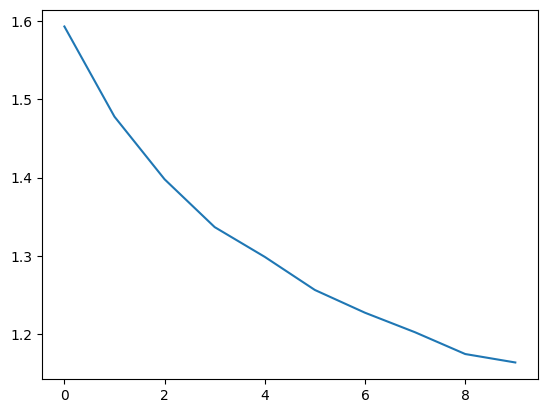

In [42]:
import matplotlib.pyplot as plt
plt.plot(train_loss)

The CrossEntropyLoss() function includes the softmax calculation, which is usually performed in the last step of an NN classifier model. When using CrossEntropyLoss(), do not include Softmax() in the output layer of your model definition.

In [43]:
torch.save(model.state_dict(), "./lenet5_model.pt")

model = LeNet5().to(device)
model.load_state_dict(torch.load("./lenet5_model.pt"))

<All keys matched successfully>